## About the Data

- Data is collected from 2016 to 2021.
- Contains Loan & payment information.
- The customer information is aggregated to ensure information is unidentifiable.

## Import Libraries

In [114]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Settings for Pandas

In [115]:
# Sets column width to show full information
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Sets describe function to show full numerical value
pd.set_option('float_format', '{:f}'.format)

## Preparing dataframe
- Read the data into a dataframe
- Check for null values

In [116]:
# Read data into a dataframe
df = pd.read_excel('../data/loan_data.xlsx')
df.head()

,ID,UEN Black Listed,SSIC,Industry,Loan ID,Product,Amount,Disbursal Amount,Insured,Disbursal Fee,Payment Amount,Due Date,Weekday,Day,Month,Year,Payment_Num,Defaulted,Is Paid,Loan Status,Funding Date,Expected First Payment Date,Interest Rate,Tenor,Status,Delinquent,Delinquent Amount,Date of First Delinquency,First Payment Date
0,1000513,1,46900,Wholesale trade of a variety of goods without a dominant product,484,1,100000.000000,99000.000000,0,1000.000000,18166.670000,2016-09-04,7,4,9,2016,1,0,1,Repaid in Full,2016-03-04,2016-04-09,1.500000,6,Closed - Obligations met,0,0.000000,2016-08-04,2016-04-04
1,1000513,1,46900,Wholesale trade of a variety of goods without a dominant product,484,1,100000.000000,99000.000000,0,1000.000000,18166.670000,2016-08-04,4,4,8,2016,2,1,1,Repaid in Full,2016-03-04,2016-04-09,1.500000,6,Closed - Obligations met,0,0.000000,2016-08-04,2016-04-04
2,1000513,1,46900,Wholesale trade of a variety of goods without a dominant product,484,1,100000.000000,99000.000000,0,1000.000000,18166.670000,2016-07-04,1,4,7,2016,3,0,1,Repaid in Full,2016-03-04,2016-04-09,1.500000,6,Closed - Obligations met,0,0.000000,2016-08-04,2016-04-04
3,1000513,1,46900,Wholesale trade of a variety of goods without a dominant product,484,1,100000.000000,99000.000000,0,1000.000000,18166.670000,2016-06-04,6,4,6,2016,4,0,1,Repaid in Full,2016-03-04,2016-04-09,1.500000,6,Closed - Obligations met,0,0.000000,2016-08-04,2016-04-04
4,1000513,1,46900,Wholesale trade of a variety of goods without a dominant product,484,1,100000.000000,99000.000000,0,1000.000000,18166.670000,2016-05-04,3,4,5,2016,5,0,1,Repaid in Full,2016-03-04,2016-04-09,1.500000,6,Closed - Obligations met,0,0.000000,2016-08-04,2016-04-04


In [117]:
# Checking datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25597 entries, 0 to 25596
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           25597 non-null  int64         
 1   UEN Black Listed             25597 non-null  int64         
 2   SSIC                         25597 non-null  int64         
 3   Industry                     25597 non-null  object        
 4   Loan ID                      25597 non-null  int64         
 5   Product                      25597 non-null  int64         
 6   Amount                       25597 non-null  float64       
 7   Disbursal Amount             25597 non-null  float64       
 8   Insured                      25597 non-null  int64         
 9   Disbursal Fee                25597 non-null  float64       
 10  Payment Amount               25597 non-null  float64       
 11  Due Date                     25597 non-nu

In [118]:
# Check for null values
df.isnull().sum()

ID                                 0
UEN Black Listed                   0
SSIC                               0
Industry                           0
Loan ID                            0
Product                            0
Amount                             0
Disbursal Amount                   0
Insured                            0
Disbursal Fee                      0
Payment Amount                     0
Due Date                           0
Weekday                            0
Day                                0
Month                              0
Year                               0
Payment_Num                        0
Defaulted                          0
Is Paid                            0
Loan Status                        0
Funding Date                     717
Expected First Payment Date        0
Interest Rate                      0
Tenor                              0
Status                             0
Delinquent                         0
Delinquent Amount                  0
D

**Null values are present in "Funding Date" and "Date of First Delinquency", we need to clean this up.**

In [119]:
# Dropping Partial Applications **Incomplete loan applications
df = df[df['Status']!="Partial Application"]

# Replace null values to zero
df.fillna(0, inplace=True)

In [120]:
# Check for changes
df.isnull().sum()

ID                             0
UEN Black Listed               0
SSIC                           0
Industry                       0
Loan ID                        0
Product                        0
Amount                         0
Disbursal Amount               0
Insured                        0
Disbursal Fee                  0
Payment Amount                 0
Due Date                       0
Weekday                        0
Day                            0
Month                          0
Year                           0
Payment_Num                    0
Defaulted                      0
Is Paid                        0
Loan Status                    0
Funding Date                   0
Expected First Payment Date    0
Interest Rate                  0
Tenor                          0
Status                         0
Delinquent                     0
Delinquent Amount              0
Date of First Delinquency      0
First Payment Date             0
dtype: int64

In [121]:
df.to_excel('../data/loans.xlsx',index=False)

## Exploratory Data Analysis

In [9]:
#sns.pairplot(df, hue='Defaulted', corner=True);

In [10]:
#sns.pairplot(df[df['Defaulted']==1], corner=True);

In [11]:
#sns.pairplot(df[df['Defaulted']==0], corner=True);

In [122]:
df['Defaulted'].value_counts()

0    20927
1     3953
Name: Defaulted, dtype: int64

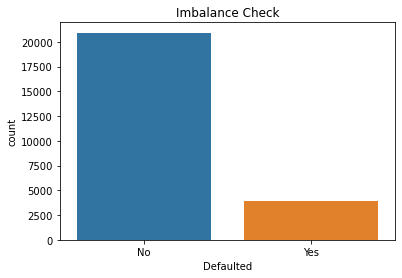

In [131]:
chart = sns.countplot(x=df['Defaulted'])

chart.set_xticklabels(['No','Yes'])
plt.title("Imbalance Check")
plt.show()

## Dealing with Imbalance

### Under-Sampling

In [159]:
# class count
class_count_0, class_count_1 = df['Defaulted'].value_counts()

# Separate class
class_0 = df[df['Defaulted'] == 0]
class_1 = df[df['Defaulted'] == 1]# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (20927, 29)
class 1: (3953, 29)


total class of 1 and 0:
0    3953
1    3953
Name: Defaulted, dtype: int64


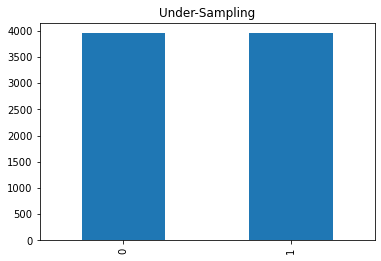

In [160]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:")
print(test_under['Defaulted'].value_counts())# plot the count after under-sampeling

test_under['Defaulted'].value_counts().plot(kind='bar', title='Under-Sampling');

In [145]:
test_under.to_excel('../data/loans_undersampling.xlsx',index=False)

## Random Over-Sampling

In [164]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [165]:
# class count
class_count_0, class_count_1 = df['Defaulted'].value_counts()

# Separate class
class_0 = df[df['Defaulted'] == 0]
class_1 = df[df['Defaulted'] == 1]# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (20927, 29)
class 1: (3953, 29)


In [ ]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)